In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [32]:
import matplotlib.pylab as plt
import seaborn as sns; sns.set() 
%matplotlib inline

In [33]:
from sklearn.datasets import load_digits

In [34]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [35]:
# so here 1797 images are provided with each image has 64 pixcels(8x8 matrix). 

In [36]:
kmeans = KMeans(n_clusters=10, random_state=0)

In [37]:
kmeans.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [38]:
clusters = kmeans.predict(digits.data)

In [39]:
kmeans.cluster_centers_.shape

(10, 64)

### How do centers look like

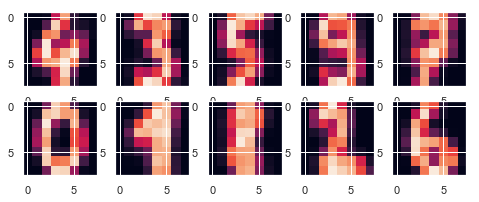

In [40]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.imshow(center)

Observe that even without the labels, KMeans clustering is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

### Create labels for data points

In [41]:
from scipy.stats import mode

In [27]:
labels = np.zeros_like(clusters)
labels

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
clusters

array([5, 7, 7, ..., 7, 3, 3])

In [18]:
i=1
mask = (clusters == i)
mask

array([False, False, False, ..., False, False, False])

In [19]:
digits.target[mask]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 3, 9, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 9, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 9, 2, 9, 3, 8, 3, 3, 3, 3])

In [20]:
mode(digits.target[mask])

ModeResult(mode=array([3]), count=array([154]))

In [21]:
mode(digits.target[mask])[0]

array([3])

In [42]:
# All above step in single function
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [25]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [26]:
labels

array([0, 8, 8, ..., 8, 9, 9])

Lets check how accurate our unsupervised clustering was in finding similar digits within the data

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(digits.target, labels)

0.7935447968836951

With just a simple k-means algorithm, we discovered the correct grouping for 80% of the input digits

### Confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
mat = confusion_matrix(digits.target, labels)

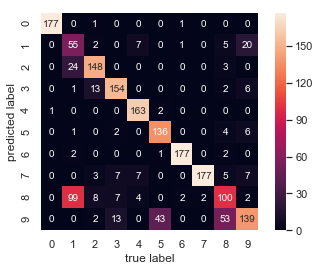

In [47]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### As we might expect from the cluster centers we visualized before, the main point of confusion is between the eights and ones. But this still shows that using k-means clustering, we can essentially build a digit classifier without reference to any known labels!